In [1763]:
import pandas as pd
data = pd.read_csv("train.csv")
data.head(-1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [1764]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1765]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1766]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [1767]:
data.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [1768]:
data.drop(["Cabin"],axis=1,inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [1769]:
data = pd.get_dummies(data, columns=["Sex","Embarked"])

In [1770]:
data[["Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]] = data[["Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]].astype(int)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [1771]:
num_col = []
for i in data.columns:
  if data[i].dtype != "object" and data[i].dtype != "bool":
    print(f"{i} = {data[i].std()}")
    num_col.append(i)

Survived = 0.4865924542648575
Pclass = 0.836071240977049
Age = 13.002015226002882
SibSp = 1.1027434322934317
Parch = 0.8060572211299483
Fare = 49.6934285971809
Sex_female = 0.4779900708960982
Sex_male = 0.4779900708960981
Embarked_C = 0.3913721645054733
Embarked_Q = 0.2811406921417042
Embarked_S = 0.4467509100341466


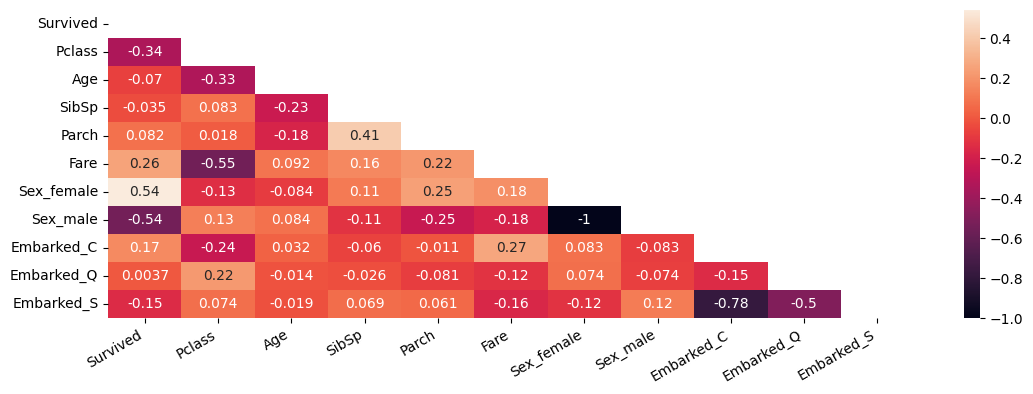

In [1772]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
corr = data[num_col].corr()
plt.figure(figsize=(13,4))
heatmap = sns.heatmap(corr, annot=True,mask=np.triu(corr), annot_kws={'fontsize': 10})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, ha='right')
plt.show()

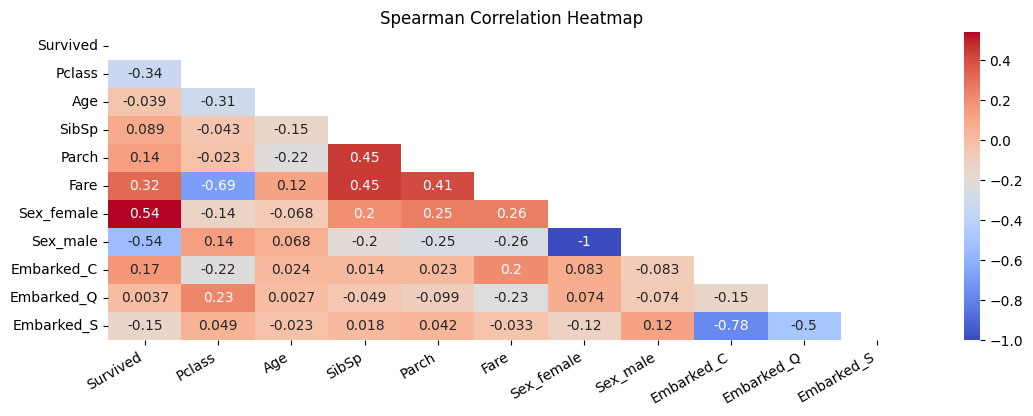

In [1773]:
spearman_corr = data[num_col].corr(method='spearman')

plt.figure(figsize=(13, 4))
heatmap = sns.heatmap(spearman_corr, annot=True, mask=np.triu(spearman_corr), annot_kws={'fontsize': 10}, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, ha='right')
plt.title("Spearman Correlation Heatmap")
plt.show()


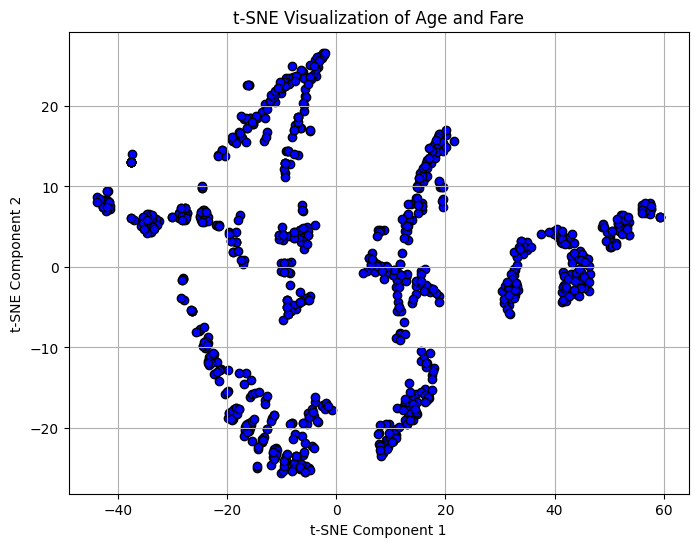

In [1774]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

selected_data = data[['Age', 'Fare']]

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(selected_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', marker='o', edgecolor='k')
plt.title("t-SNE Visualization of Age and Fare")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()


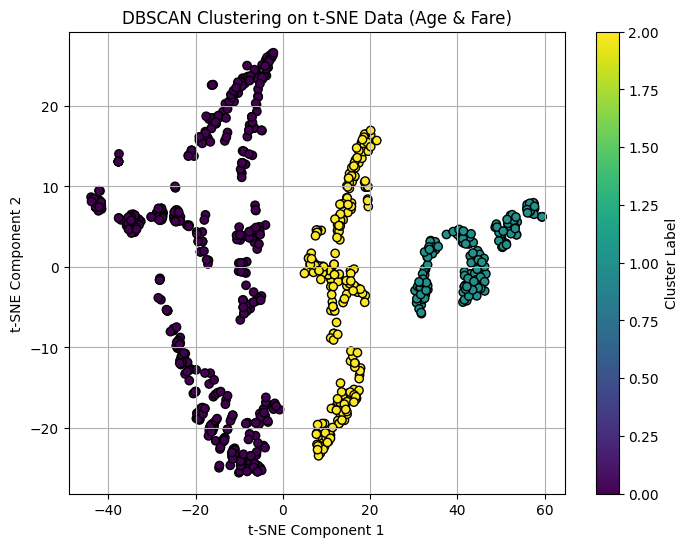

In [1775]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=8, min_samples=15)
dbscan_labels = dbscan.fit_predict(tsne_results)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering on t-SNE Data (Age & Fare)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()


In [1776]:
data["Winner Cluster"] = dbscan_labels
data.drop(["Fare","Age"],axis=1,inplace=True)

<ipython-input-1777-9468b7754c04>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cluster_range, inertia, 'bo-', color='blue')


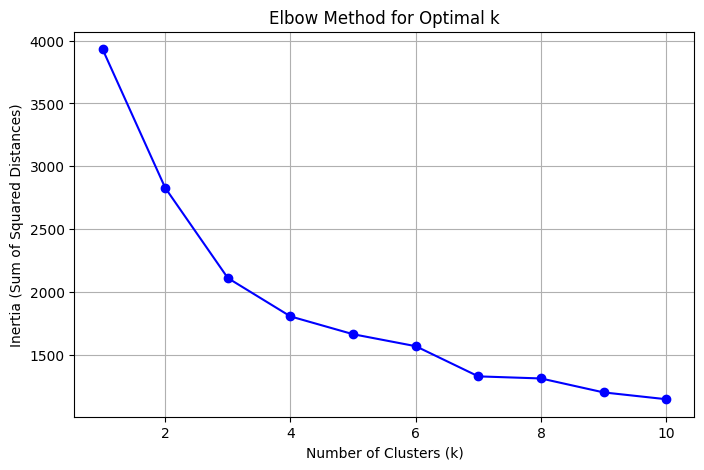

In [1777]:
from sklearn.cluster import KMeans
cluster_range = range(1, 11)
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, 'bo-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [1778]:
data["Survived"] = data["Survived"].astype("string")

In [1779]:
data.replace({"1":"Survived","0":"Didn't Survived"},inplace=True)

In [1780]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [1781]:
data['Survived'] = data['Survived'].apply(lambda x: 1 if x == "Survived" else 0)

In [1782]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = data.drop("Survived",axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=4, random_state=42)

clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

In [1783]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

f1 = f1_score(y_test, y_pred,pos_label=1)
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.82

Confusion Matrix:
 [[95 10]
 [23 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

F1-Score: 0.76


In [1784]:
clusterd_data = data.copy()
clusterd_data["CF"] = clf1.predict(data.drop("Survived",axis=1))

In [1785]:
clusterd_data2 = clusterd_data.copy()

# **CLUSTEREEEDDDD**

In [1786]:
clusterd_data2['cluster_data'] = clusterd_data.apply(lambda row: False if row['Survived'] == row['CF'] else True, axis=1)
clusterd_data = clusterd_data2.copy()

In [1787]:
clusterd_data2.drop(["CF","Survived"],axis=1,inplace=True)

In [1788]:
clusterd_data.drop("CF",axis=1,inplace=True)

In [1789]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = clusterd_data.drop(["cluster_data","Survived"],axis=1)
y = clusterd_data["cluster_data"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from imblearn.over_sampling import SMOTE

clf2 = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=4, random_state=42)#########

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

clf2.fit(X_resampled, y_resampled)
y_pred_resampled = clf2.predict(X_test)
""""
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=4, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)"""
y_pred = y_pred_resampled

In [1790]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

f1 = f1_score(y_test, y_pred, pos_label=0)
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.73

Confusion Matrix:
 [[118  28]
 [ 20  13]]

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.81      0.83       146
        True       0.32      0.39      0.35        33

    accuracy                           0.73       179
   macro avg       0.59      0.60      0.59       179
weighted avg       0.76      0.73      0.74       179

F1-Score: 0.83


In [1791]:
data["CF1"] = clf2.predict(data.drop("Survived", axis=1))
data

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Winner Cluster,CF1
0,0,3,1,0,0,1,0,0,1,0,False
1,1,1,1,0,1,0,1,0,0,1,False
2,1,3,0,0,1,0,0,0,1,0,True
3,1,1,1,0,1,0,0,0,1,1,False
4,0,3,0,0,0,1,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1,0,False
887,1,1,0,0,1,0,0,0,1,2,False
888,0,3,1,2,1,0,0,0,1,2,False
889,1,1,0,0,0,1,1,0,0,2,False


In [1792]:
X = data.drop("Survived",axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf3 = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
y_pred = clf3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

f1 = f1_score(y_test, y_pred, pos_label=0)
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.82

Confusion Matrix:
 [[96  9]
 [24 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

F1-Score: 0.85


In [1793]:
test = pd.read_csv("test.csv")
data = test
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
data.drop(["Cabin"],axis=1,inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = pd.get_dummies(data, columns=["Sex","Embarked"])
data[["Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]] = data[["Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]].astype(int)
selected_data = data[['Age', 'Fare']]
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(selected_data.fillna(selected_data["Fare"].mean()))

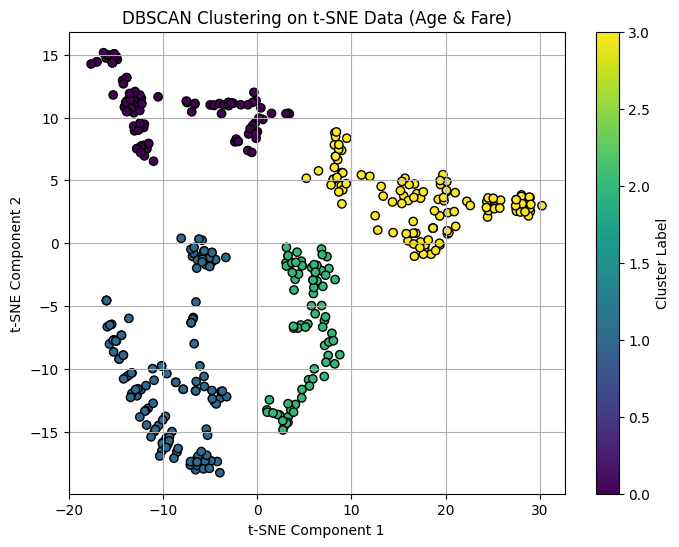

In [1794]:
dbscan = DBSCAN(eps=4, min_samples=15)
dbscan_labels = dbscan.fit_predict(tsne_results)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering on t-SNE Data (Age & Fare)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()


In [1795]:
data["Winner Cluster"] = dbscan_labels
data.drop(["Fare","Age"],axis=1,inplace=True)

In [1796]:
data["CF1"] = clf2.predict(data)

In [1809]:
Survived = pd.DataFrame(clf3.predict(data),columns=["Survived"])

In [1815]:
sample = pd.read_csv("test.csv")
sample['Survived'] = Survived
sample = sample[['PassengerId']]
sample['Survived'] = Survived

In [1816]:
sample


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1817]:
sample.to_csv('dataframe.csv', index=False)

files.download('dataframe.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>